In [2]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
env = gym.make("FrozenLake-v1", render_mode = "human")

In [4]:
env.reset()
env.render()
env.close()

In [5]:
env.observation_space

Discrete(16)

In [6]:
env.action_space # actions left, down, up, right

Discrete(4)

In [8]:
env.P[0][1]  #transition probability, next_state, reward, is terminal state?

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

In [12]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [16]:
discountFactor = 0.9
valueFunctionVector = np.zeros(env.observation_space.n)
maxNumberOfIterations = 1000
convergenceTolerance = 10 ** (-6)


In [17]:
#convergence list
convergenceTrack = []

In [21]:
valueFunctionVectorNextIteration = np.zeros(env.observation_space.n)
valueFunctionVectorNextIteration

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
for iterations in range(maxNumberOfIterations):
    convergenceTrack.append(np.linalg.norm(valueFunctionVector, 2))
    valueFunctionVectorNextIteration = np.zeros(env.observation_space.n)
    for state in env.P:
        outerSum = 0
        for action in env.P[state]:
            innerSum = 0
            for probability, nextState, reward, isTerminalState in env.P[state][action]:
                innerSum = innerSum + probability * (reward + discountFactor * valueFunctionVector[nextState])
            outerSum = outerSum + 0.25 * innerSum
        valueFunctionVectorNextIteration[state] = outerSum
    if(np.max(np.abs(valueFunctionVectorNextIteration - valueFunctionVector)) < convergenceTolerance):
        valueFunctionVector = valueFunctionVectorNextIteration
        print('Converged!!')
        break
    valueFunctionVector = valueFunctionVectorNextIteration
    

        
        

Converged!!


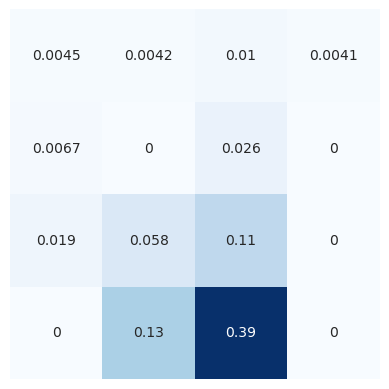

In [22]:
#visualizing the state values
def grid_print(valueFunction, reshapeDim):
    ax = sns.heatmap(valueFunction.reshape(4,4),
                    annot = True, square = True,
                    cbar = False, cmap = 'Blues',
                    xticklabels = False, yticklabels = False)
    plt.savefig('valueFunctionGrid.png', dpi = 600)
    plt.show()
grid_print(valueFunctionVector, 4)
                    

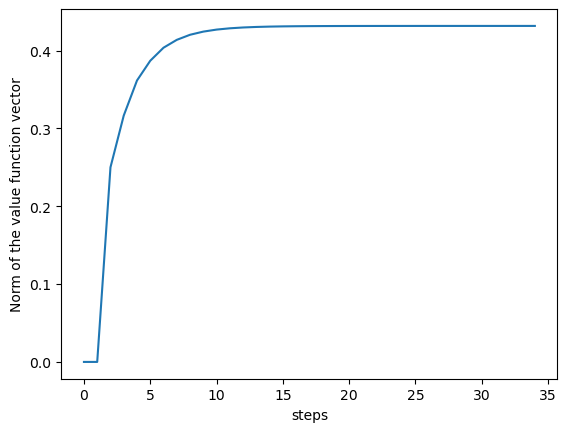

In [23]:
plt.plot(convergenceTrack)
plt.xlabel('steps')
plt.ylabel('Norm of the value function vector')
plt.savefig('convergence.png', dpi = 600)
plt.show()